##### Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
# display plots in the notebook
%matplotlib inline

housing_data = pd.read_csv('../3.03-linear-regression-part-i-lab/data/sacramento_housing_data.csv')
housing_data['state'] = ['CA' for state in housing_data['state']]
housing_data = housing_data[(housing_data.price > 0) & (housing_data.sq__ft) > 0]

df = pd.DataFrame(housing_data)

In [4]:
import statsmodels.api as sm
## dummies: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html
## df.merge
housing_data['dummy'] = [1 if x=='Residential' else 0 for x in housing_data['type'] ]


X = df[['sq__ft','longitude','latitude']] ## lowercase x -- independent variable
y = df['price'] ## dependent variable, what we want to predict
X = sm.add_constant(X) ## UPPERCASE X -- add an intercept (beta_0) to the model


#### 2 Plot the model

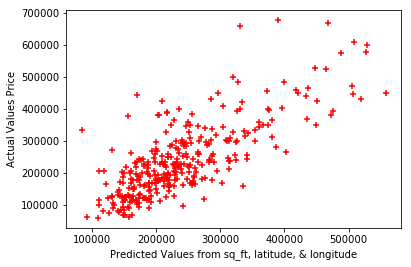

MSE: 841341725246.0


In [3]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq_ft, latitude, & longitude")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", model.mse_model

##### Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 

SLR + MLR:
    Linearity
    Independence
    Normality
    Equality of Variances
MLR:
    Independence pt 2--all 'X' variables must be independent
    

##### Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.

Linearity--generally linear (not exactly)


##### Problem 5. Interpret the y-intercept and at least two of the independent variables.

##### Problem 6. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. Write a few sentences interpreting some of the output.

(Hint: scikit-learn does not have this functionality built in, but statsmodels does.)


In [5]:

# Note the difference in argument order
model = sm.OLS(y, X).fit()  ## OLS = ordinary least squares --> minimize residual sum of squares
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           2.97e-61
Time:                        21:04:32   Log-Likelihood:                -4027.6
No. Observations:                 319   AIC:                             8063.
Df Residuals:                     315   BIC:                             8078.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.164e+07   5.85e+06      3.697      0.000      1.01e+07  3.32e+07
sq__ft       128.2138      6.616     19.380      0.000       115.197   141.231
longitude   1.962e+05   4.17e+04      4.701      0.000      1.14e+05  2.78e+05
latitude    5.708e+04   3.77e+04      1.516      0.131      -1.7e+04  1.31e+05
==============================================================================
Omnibus:                       70.993   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.146
Skew:                           1.145   Prob(JB):                     3.03e-32
Kurtosis:                       5.383   Cond. No.                     2.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### BONUS. You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.
